In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv("players_22.csv")

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
players = players.dropna(subset=features)

In [6]:
data = players[features].copy()

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


# Pseudocode

## High level

1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

In [8]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [9]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [10]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [11]:
centroids = random_centroids(data, 5)

In [12]:
centroids

,0,1,2,3,4
overall,5.565217,4.478261,5.347826,3.826087,4.260870
potential,6.869565,6.652174,5.130435,3.173913,5.565217
wage_eur,1.786838,1.042918,1.000000,2.216023,1.000000
value_eur,1.040775,1.056240,1.087169,1.042064,1.071704
age,2.481481,5.814815,1.740741,2.851852,2.481481


In [13]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [14]:
labels = get_labels(data, centroids)

In [15]:
labels.value_counts()

1    7928
4    5607
0    4307
3    1297
2      26
dtype: int64

In [28]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [30]:
def plot_clusters(data, labels):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    clear_output(wait=True)
    plt.show()

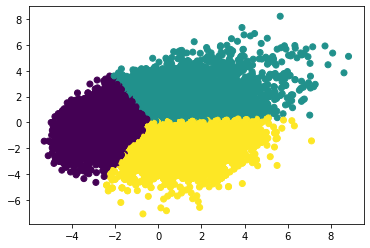

In [31]:
max_iterations = 10000
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    iteration += 1
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels)

In [32]:
centroids

,0,1,2
overall,3.436536,6.324628,5.200636
potential,5.357557,7.100439,4.894208
wage_eur,1.031374,1.456630,1.130961
value_eur,1.029343,1.311183,1.049892
age,2.674807,3.874397,5.963956


In [33]:
labels.value_counts()

2    7188
0    6162
1    5815
dtype: int64

In [22]:
players[labels == 0]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
199,120533,https://sofifa.com/player/120533/kepler-lavera...,Pepe,Kléper Laveran de Lima Ferreira,CB,82,82,5500000.0,14000.0,38,...,82,82,82,76+3,18+3,https://cdn.sofifa.net/players/120/533/22_120.png,https://cdn.sofifa.net/teams/236/60.png,https://cdn.sofifa.net/flags/pt.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
284,45186,https://sofifa.com/player/45186/joaquin-sanche...,Joaquín,Joaquín Sánchez Rodríguez,"RM, LM",81,81,8500000.0,23000.0,39,...,53+2,53+2,53+2,58+2,19+2,https://cdn.sofifa.net/players/045/186/22_120.png,https://cdn.sofifa.net/teams/449/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/es.png
292,171791,https://sofifa.com/player/171791/jose-miguel-d...,José Fonte,José Miguel da Rocha Fonte,CB,81,81,4600000.0,30000.0,37,...,80+1,80+1,80+1,69+3,17+3,https://cdn.sofifa.net/players/171/791/22_120.png,https://cdn.sofifa.net/teams/65/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/pt.png
388,1179,https://sofifa.com/player/1179/gianluigi-buffo...,G. Buffon,Gianluigi Buffon,GK,80,80,2300000.0,18000.0,43,...,28+3,28+3,28+3,26+3,78+2,https://cdn.sofifa.net/players/001/179/22_120.png,https://cdn.sofifa.net/teams/50/60.png,https://cdn.sofifa.net/flags/it.png,NaN,https://cdn.sofifa.net/flags/it.png
509,41,https://sofifa.com/player/41/andres-iniesta-lu...,Iniesta,Andrés Iniesta Luján,"CM, CAM",79,79,5500000.0,10000.0,37,...,61+3,61+3,61+3,63+3,16+3,https://cdn.sofifa.net/players/000/041/22_120.png,https://cdn.sofifa.net/teams/101146/60.png,https://cdn.sofifa.net/flags/jp.png,NaN,https://cdn.sofifa.net/flags/es.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18890,248273,https://sofifa.com/player/248273/semboi-haokip...,S. Haokip,Semboi Haokip,ST,51,51,60000.0,500.0,28,...,33+2,33+2,33+2,33+2,15+2,https://cdn.sofifa.net/players/248/273/22_120.png,https://cdn.sofifa.net/teams/111629/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png
18971,263055,https://sofifa.com/player/263055/lalkhawpuimaw...,Lalkhawpuimawia,Lalkhawpuimawia Lalkhawpuimawia,"ST, LM",51,51,60000.0,500.0,29,...,32+2,32+2,32+2,36+2,14+2,https://cdn.sofifa.net/players/263/055/22_120.png,https://cdn.sofifa.net/teams/113040/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png
19032,257936,https://sofifa.com/player/257936/yue-song/220002,Song Yue,宋岳,"CB, CM, CDM",50,50,40000.0,2000.0,29,...,50,50,50,49+1,11+2,https://cdn.sofifa.net/players/257/936/22_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19100,157190,https://sofifa.com/player/157190/john-russell/...,J. Russell,John Russell,"CM, CDM",49,49,15000.0,500.0,36,...,50-1,50-1,50-1,46+2,14+2,https://cdn.sofifa.net/players/157/190/22_120.png,https://cdn.sofifa.net/teams/563/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [25]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,6.812362,3.888733,5.223541
potential,7.248821,5.673188,4.893503
wage_eur,1.730127,1.044385,1.125521
value_eur,1.459715,1.039769,1.044473
age,4.488401,2.902651,6.121307
